In [1]:
import pandas as pd
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import math
from tabulate import tabulate

%matplotlib inline


In [2]:
df = pd.read_csv('Health_insurance.csv')

In [3]:
df

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
def quality_report(df):
    """
    Description: Displays quality of data in terms of missing values, 
    unique numbers, datatypes etc.
    
    Arguments: Dataframe
    """
    dtypes = df.dtypes
    nuniq = df.T.apply(lambda x: x.nunique(), axis=1)
    total = df.isnull().sum().sort_values(ascending = False)
    percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
    quality_df  = pd.concat([total, percent, nuniq, dtypes], axis=1, keys=['Total NaN', 'Percent of NaN','Nunique', 'Dtype'])
    display(quality_df)


In [6]:
quality_report(df)

Total NaN  Percent of NaN  Nunique    Dtype
age               0             0.0       47    int64
sex               0             0.0        2   object
bmi               0             0.0      548  float64
children          0             0.0        6    int64
smoker            0             0.0        2   object
region            0             0.0        4   object
charges           0             0.0     1337  float64

Looks like "age", "children", "bmi" and "charges" are numbers, whereas "sex", "smoker" and "region" are strings (possibly categories). None of the columns contain any missing values, which saves us a fair bit of work!

Here are some statistics for the numerical columns:

In [7]:
df.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

The ranges of values in the numerical columns seem reasonable too, so we may not have to do much data cleaning or correction. The "charges" column seems to be significantly skewed however, as the median (50 percentile,it is also know as 2nd quartile) is much lower than the maximum value.

### Exploratory Analysis and Visualization
Let's explore the data by visualizing the distribution of values in some columns of the dataset, and the relationships between "charges" and other columns.

We'll use libraries Matplotlib, Seaborn and Plotly for visualization.

In [8]:
def numeric_distribution_plot(df):
    """
    Description : Gives distribution plot for all the numeric features
    in the dataframe passed
    
    Argument : Dataframe
    """
    for col in df.columns:
        if df[col].dtype != 'object':
            print(df[col].describe())
            plt.figure(figsize=(12,5))
            plt.title("Distribution of "+col)
            ax = sns.distplot(df[col].dropna())
            plt.tight_layout()
            plt.show()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64


C:\Users\OLUBAYODE\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


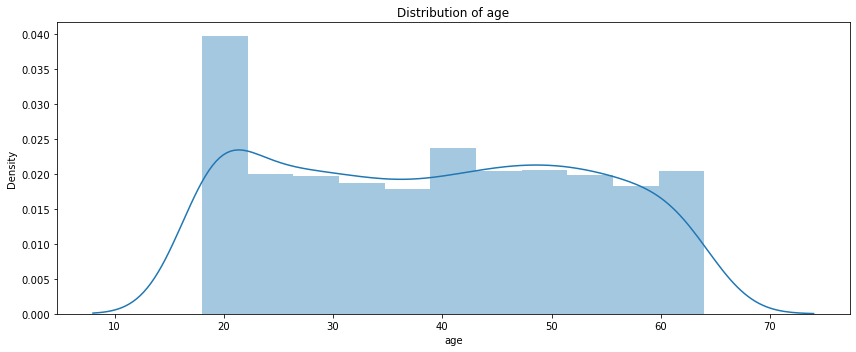

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64


C:\Users\OLUBAYODE\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


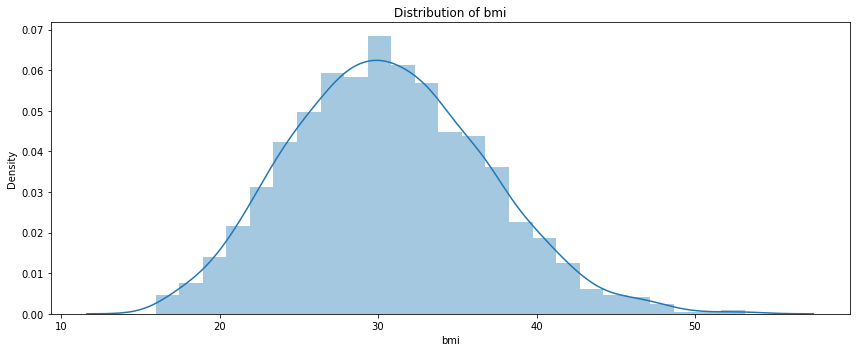

count    1338.000000
mean        1.094918
std         1.205493
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: children, dtype: float64


C:\Users\OLUBAYODE\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


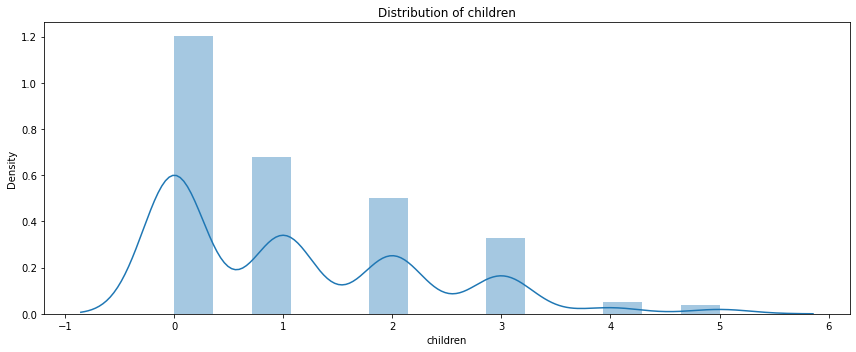

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64


C:\Users\OLUBAYODE\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


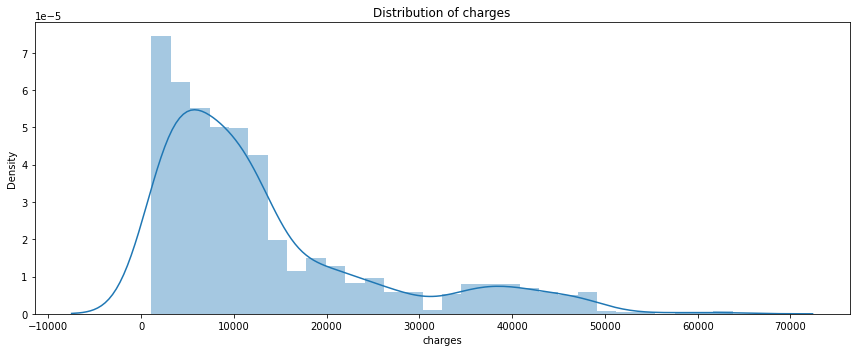

In [9]:
numeric_distribution_plot(df)

In [10]:
# import plotly.io as pio;pio.renderers.default='notebook'

In [11]:
# conda uninstall plotly

In [12]:
import plotly.express as px
import matplotlib
# !pip install plotly matplotlib seaborn --quiet

The following settings will improve the default style and font sizes for our charts

In [13]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Age
Age is a numeric column. The minimum age in the dataset is 18 and the maximum age is 64. Check the graph plotted above. Thus, we can visualize the distribution of age using a histogram with 47 bins (one for each year) and a box plot. We'll use plotly to make the chart interactive, but you can create similar charts using Seaborn.

In [14]:
df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

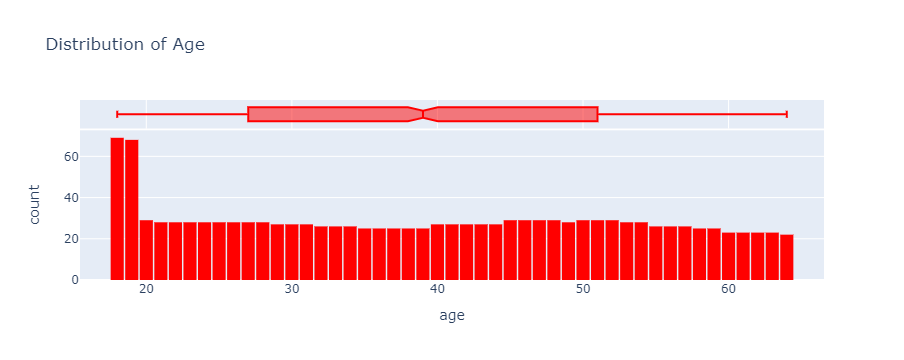

In [15]:
fig = px.histogram(df, 
                   x='age', 
                   marginal='box',
                   color_discrete_sequence=['red'],
                   nbins=47, 
                   title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

The distribution of ages in the dataset is almost uniform, with 20-30 customers at every age, except for the ages 18 and 19, which seem to have over twice as many customers as other ages.

Insight: why there are over twice as many customers with ages 18 and 19, compared to other ages?

Insuarance agency charges more money for same premium as you get older and here is the same case.people who are younger are less prone to getting sick and thus company has to pay them less for their medical bills.otherwise every age group in US has eqvivalent population density.

### Body Mass Index
Let's look at the distribution of BMI (Body Mass Index) of customers, using a histogram and box plot.

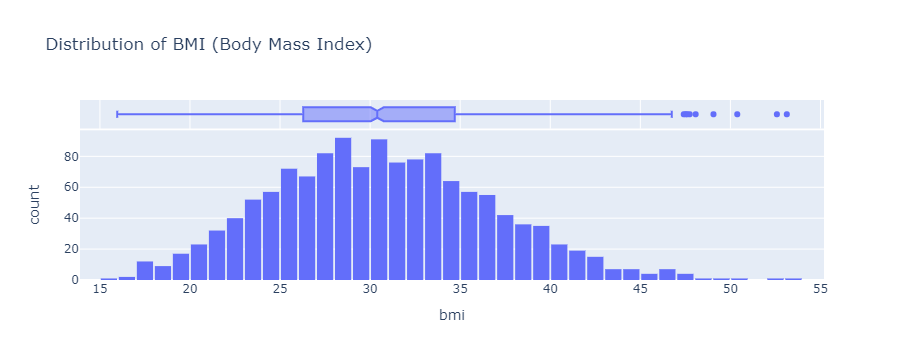

In [17]:
fig = px.histogram(df, 
                   x='bmi', 
                   marginal='box',
                   nbins=47,
                   title='Distribution of BMI (Body Mass Index)')
fig.update_layout(bargap=0.1)
fig.show()


The measurements of body mass index seem to form a Gaussian distribution centered around the value 30, with a few outliers towards the right.

Insight: why the distribution of ages forms a uniform distribution while the distribution of BMIs forms a gaussian distribution?

As there are same number of people in age groups the distribution we get is uniform distribution.But, for BMIs distribution we get gaussian distribution as people who are between 20-30 are considered to be healthy relatively and less than or more than this range is considered to be health risk categories and these people are more prone to health issues and thus company will have to pay more medical bills of this kind of customers and thus they provide these type of people same health insuarance at higher prices and which in-turn attracts lesser people with that of healthy range BMI because they have to pay more.

### Charges
Let's visualize the distribution of "charges" i.e. the annual medical charges for customers. This is the column we're trying to predict. Let's also use the categorical column "smoker" to distinguish the charges for smokers and non-smokers.

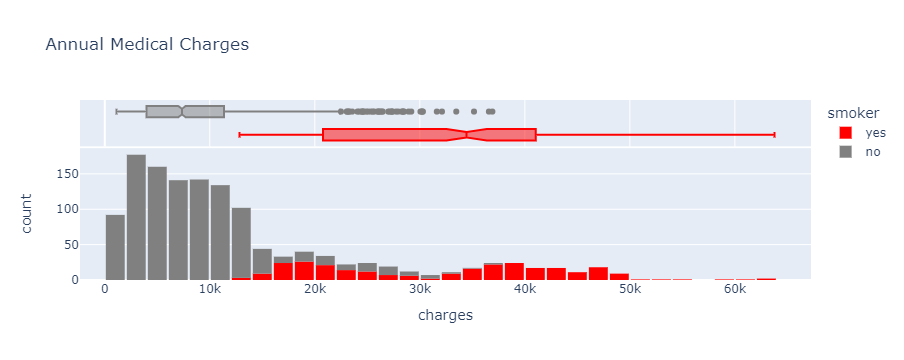

In [18]:
fig = px.histogram(df, 
                   x='charges', 
                   marginal='box', 
                   color='smoker', 
                   color_discrete_sequence=['red', 'grey'], 
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

We can make the following observations from the above graph:

For most customers, the annual medical charges are under 10,000. Only a small fraction of customer have higher medical expenses, possibly due to accidents, major illnesses and genetic diseases. The distribution follows a "power law" There is a significant difference in medical expenses between smokers and non-smokers. While the median for non-smokers is 7300. the median for smokers is close to $35,000

### Visualization of the distribution of medical charges in connection with other factors like "sex" and "region".

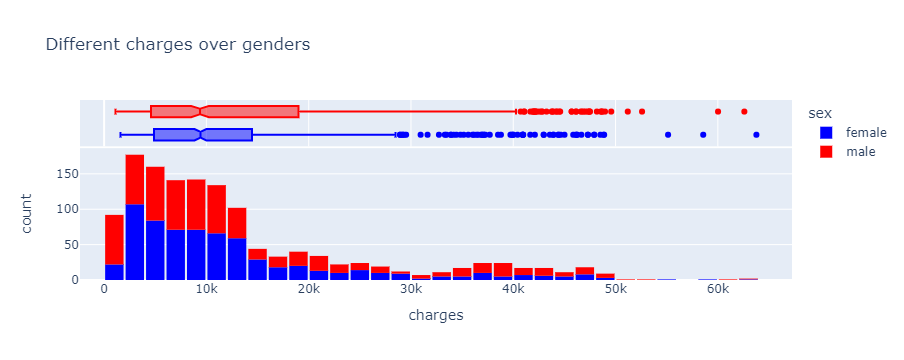

In [55]:
fig = px.histogram(df,
                   x = 'charges',
                   marginal='box',
                   color = 'sex',
                   color_discrete_sequence = ["blue","red"],
                   title = 'Different charges over genders'
                  )
fig.update_layout(bargap=0.1)
fig.show()

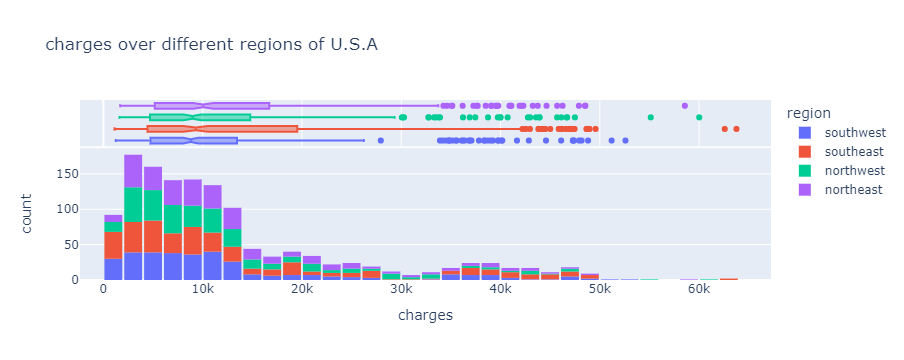

In [22]:
fig = px.histogram(df,
                  x = "charges",
                  marginal = 'box', 
                   color="region",
                  title = "charges over different regions of U.S.A")
fig.update_layout(bargap=0.1)
fig.show()

Here in the distribution of charges over gender we see that males are substancially charged more because by subconsious behaviour males are exploratory and they are more likely to take risks and that keeps them in danger more than their counterpart.It is also evident that males of U.S are more inclined to get health insuarrance then female. And, in second distribution we see that southeaster part of U.S is leading in charges but majority of all customers from all parts of US are charged between 0-20k only.

### Smoker
Let's visualize the distribution of the "smoker" column (containing values "yes" and "no") using a histogram.

In [23]:
df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

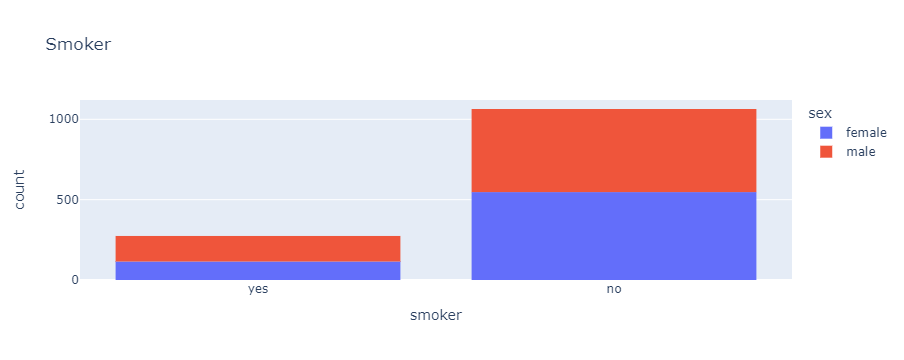

In [24]:
px.histogram(df, x='smoker', color='sex', title='Smoker')

It appears that 20% of customers have reported that they smoke.We can also see that smoking appears a more common habit among males. This is true for the given dataset only and so we should always verify if these results of analysis also matches the general population which we are going to use our model on otherwise the model will assume that in general population also 20 % people are smokers but in reality it was only 10 % so we would get incorrect predictions.So it is best to check if our primary data analysis matches the results of the general public.



### Visualization of the distributions of the "sex", "region" and "children" columns¶

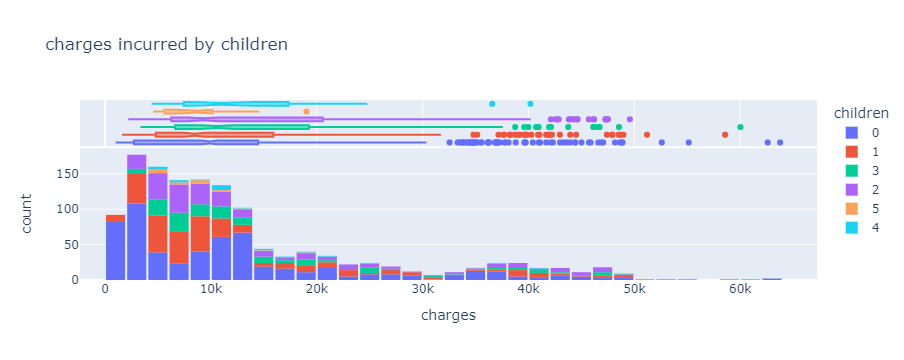

In [25]:
fig = px.histogram(df,
                  x = 'charges',
                   marginal ="box",
                  color = 'children',
                  title = 'charges incurred by children')
fig.update_layout(bargap=0.1)
fig.show()

It seems that majority of our customers have 0 or 1 child and median charges vary between 8.5k to 11k dollars

We can also conclude that people who have more children are given less priority in terms of pricing discounts.

Having looked at individual columns, we can now visualize the relationship between "charges" (the value we wish to predict) and other columns.

### Age and Charges
Let's visualize the relationship between "age" and "charges" using a scatter plot. Each point in the scatter plot represents one customer. We'll also use values in the "smoker" column to color the points.

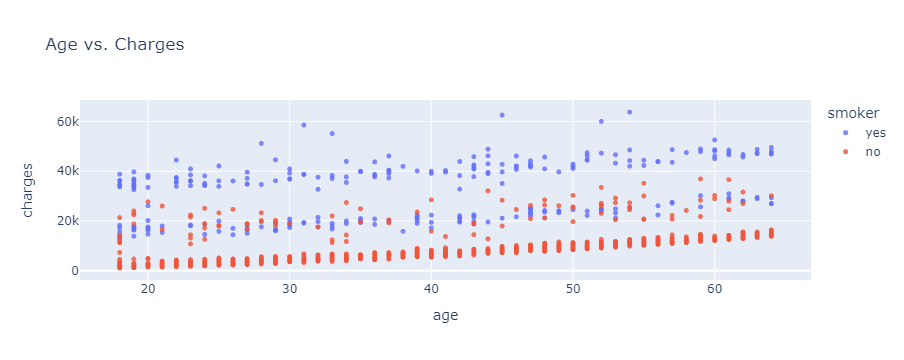

In [26]:
fig = px.scatter(df, 
                 x='age', 
                 y='charges', 
                 color='smoker', 
                 opacity=0.8, 
                 hover_data=['sex'], 
                 title='Age vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

We can make the following observations from the above chart:

The general trend seems to be that medical charges increase with age, as we might expect. However, there is significant variation at every age, and it's clear that age alone cannot be used to accurately determine medical charges.
We can see three "clusters" of points, each of which seems to form a line with an increasing slope:

The first and the largest cluster consists primary of presumably "healthy non-smokers" who have relatively low medical charges compared to others

The second cluster contains a mix of smokers and non-smokers. It's possible that these are actually two distinct but overlapping clusters: "non-smokers with medical issues" and "smokers without major medical issues".

The final cluster consists exclusively of smokers, presumably smokers with major medical issues that are possibly related to or worsened by smoking.

Insight: What other inferences can we draw from the above chart?

even if you have ailment or not people who are smokers for majority of the cases incurred more charges in medical bills than non-smokers and this difference is not small it is in the range of 5000 to 1000 $

### BMI and Charges
Let's visualize the relationship between BMI (body mass index) and charges using another scatter plot. Once again, we'll use the values from the "smoker" column to color the points

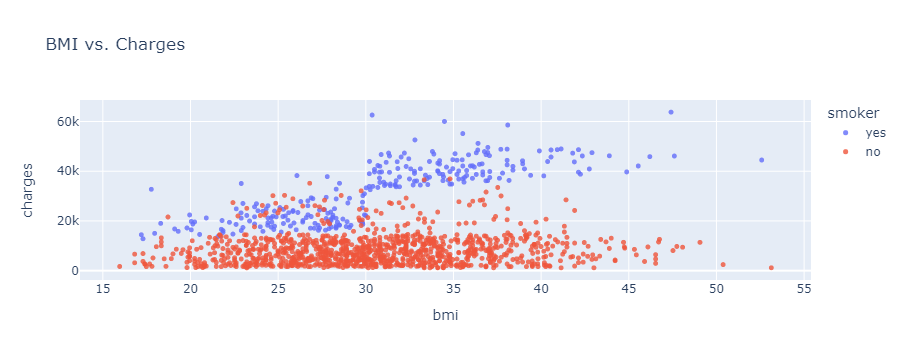

In [28]:
fig = px.scatter(df, 
                 x='bmi', 
                 y='charges', 
                 color='smoker', 
                 opacity=0.8, 
                 hover_data=['sex'], 
                 title='BMI vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

It appears that for non-smokers, an increase in BMI doesn't seem to be related to an increase in medical charges. However, medical charges seem to be significantly higher for smokers with a BMI greater than 30.

### Visualizing how the "charges" column is related to other columns ("children", "sex", "region" and "smoker").

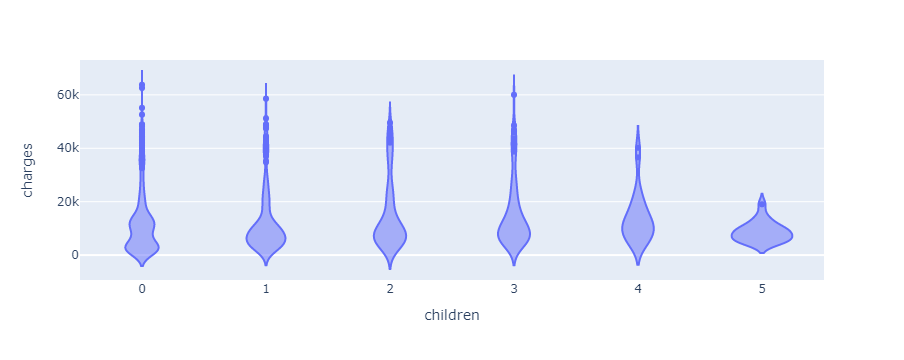

In [57]:
px.violin(df,x = 'children',y = 'charges')

There doesn't seem to have a strong trend among this variables but we can see that customer having 5 children have charges incurred in a very specific range of 0 to 20,000$ and majority of customers having any number of children or no children altogether have charges in range of 0-20,000 dollars

<AxesSubplot:xlabel='sex', ylabel='charges'>

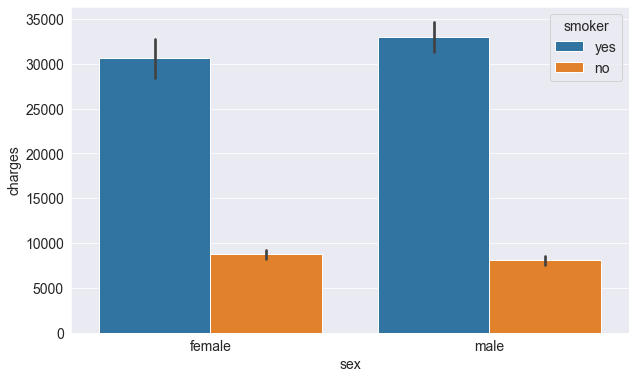

In [30]:
sns.barplot(data = df,x = 'sex',y = 'charges',hue = "smoker")

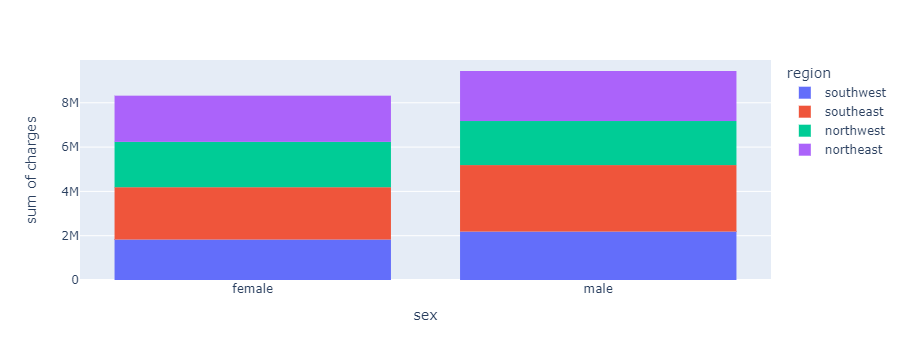

In [31]:
px.histogram(df,x='sex',y = 'charges',color = 'region')

We can infer that from every region our customer base which has males are incurring more bills but interestingly females of northwest region are having more medical bills why is this happening that needs more in dept research

### Correlation
As you can tell from the analysis, the values in some columns are more closely related to the values in "charges" compared to other columns. E.g. "age" and "charges" seem to grow together, whereas "bmi" and "charges" don't.

This relationship is often expressed numerically using a measure called the correlation coefficient, which can be computed using the .corr method of a Pandas series

In [32]:
df.charges.corr(df.age)

0.29900819333064765

In [33]:
df.charges.corr(df.bmi)

0.19834096883362892

In [34]:
df.children.corr(df.charges)

0.06799822684790487

To compute the correlation for categorical columns, they must first be converted into numeric columns.

In [35]:
smoker_values = {'no': 0, 'yes': 1}
smoker_numeric = df.smoker.map(smoker_values)
df.charges.corr(smoker_numeric)

0.7872514304984772

### Here's how correlation coefficients can be interpreted

Strength: The greater the absolute value of the correlation coefficient, the stronger the relationship.

The extreme values of -1 and 1 indicate a perfectly linear relationship where a change in one variable is accompanied by a perfectly consistent change in the other. For these relationships, all of the data points fall on a line. In practice, you won’t see either type of perfect relationship.

A coefficient of zero represents no linear relationship. As one variable increases, there is no tendency in the other variable to either increase or decrease.

When the value is in-between 0 and +1/-1, there is a relationship, but the points don’t all fall on a line. As r approaches -1 or 1, the strength of the relationship increases and the data points tend to fall closer to a line.

Direction: The sign of the correlation coefficient represents the direction of the relationship.

Positive coefficients indicate that when the value of one variable increases, the value of the other variable also tends to increase. Positive relationships produce an upward slope on a scatterplot.

Negative coefficients represent cases when the value of one variable increases, the value of the other variable tends to decrease. Negative relationships produce a downward slope.

Pandas dataframes also provide a .corr method to compute the correlation coefficients between all pairs of numeric columns.

In [36]:
df.corr()

age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000

The result of .corr is called a correlation matrix and is often visualized using a heatmap

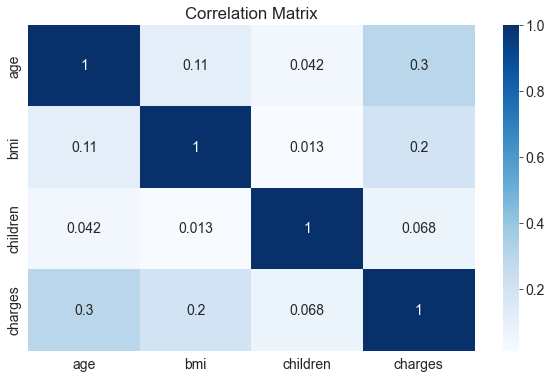

In [37]:
sns.heatmap(df.corr(), cmap='Blues', annot=True)
plt.title('Correlation Matrix');

### Linear Regression using a Single Feature
We now know that the "smoker" and "age" columns have the strongest correlation with "charges". Let's try to find a way of estimating the value of "charges" using the value of "age" for non-smokers. First, let's create a data frame containing just the data for non-smokers.

In [38]:
non_smoker_df = df[df.smoker == 'no']

Next, let's visualize the relationship between "age" and "charges"

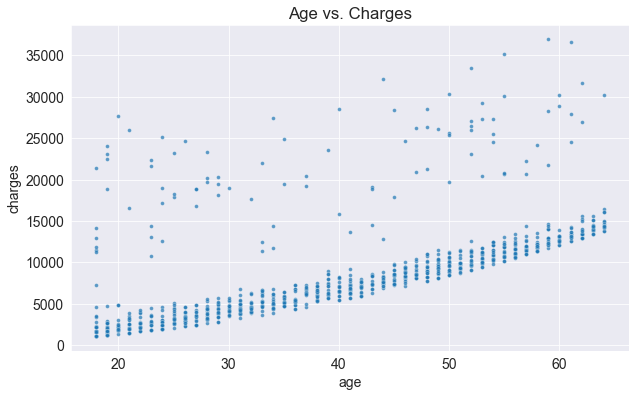

In [39]:
plt.title('Age vs. Charges')
sns.scatterplot(data=non_smoker_df, x='age', y='charges', alpha=0.7, s=15);

Apart from a few exceptions, the points seem to form a line. We'll try and "fit" a line using this points, and use the line to predict charges for a given age. A line on the X&Y coordinates has the following formula:

y=wx+b 
The line is characterized two numbers:  w  (called "slope") and  b  (called "intercept").

### Model
In the above case, the x axis shows "age" and the y axis shows "charges". Thus, we're assume the following relationship between the two:

charges=w×age+b 
We'll try determine  w  and  b  for the line that best fits the data.

This technique is called linear regression, and we call the above equation a linear regression model, because it models the relationship between "age" and "charges" as a straight line.

The numbers  w  and  b  are called the parameters or weights of the model.

The values in the "age" column of the dataset are called the inputs to the model and the values in the charges column are called "targets".

Let define a helper function estimate_charges, to compute  charges , given  age ,  w  and  b .

In [40]:
def estimate_charges(age, w, b):
    return w * age + b

The estimate_charges function is our very first model.

Let's try some values of  w  and  b

In [41]:
w = 50
b = 100

In [42]:
estimate_charges(30,w,b)

1600

In [44]:
est = lambda age, w,b: w * age + b

In [45]:
est(30,w,b)

1600

In [46]:
ages = non_smoker_df.age
estimated_charges = estimate_charges(ages, w, b)
estimated_charges

1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64

In [47]:
non_smoker_df.charges

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

We can plot the estimated charges using a line graph

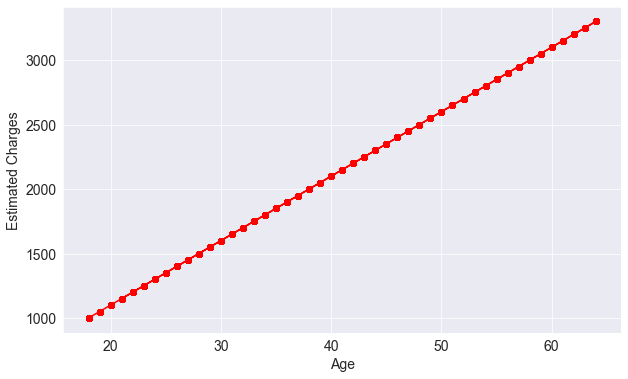

In [48]:
plt.scatter(ages, estimated_charges);
plt.plot(ages,estimated_charges,'r-o')
plt.xlabel('Age');
plt.ylabel('Estimated Charges');

As expected, the points lie on a straight line.

We can overlay this line on the actual data, so see how well our model fits the data.

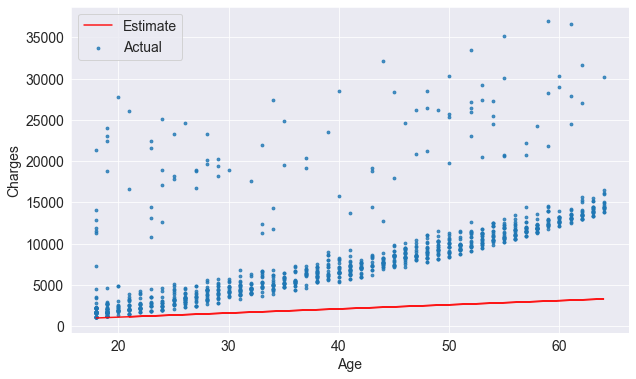

In [49]:
target = non_smoker_df.charges

plt.plot(ages, estimated_charges, 'r', alpha=0.9);
plt.scatter(ages, target, s=8,alpha=0.8);
plt.xlabel('Age');
plt.ylabel('Charges')
plt.legend(['Estimate', 'Actual']);

Clearly, the our estimates are quite poor and the line does not "fit" the data. However, we can try different values of  w  and  b  to move the line around. Let's define a helper function try_parameters which takes w and b as inputs and creates the above plot.

In [50]:
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    
    estimated_charges = estimate_charges(ages, w, b)
    
    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

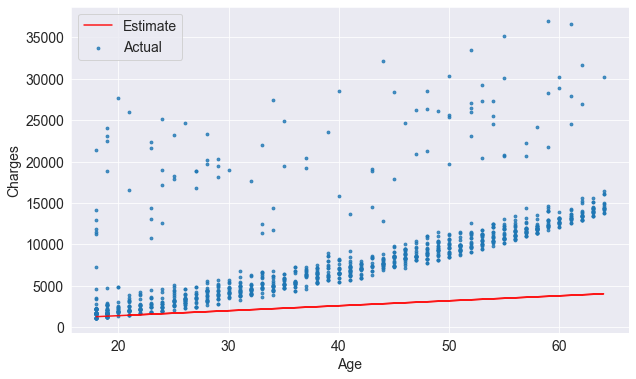

In [51]:
try_parameters(60, 200)

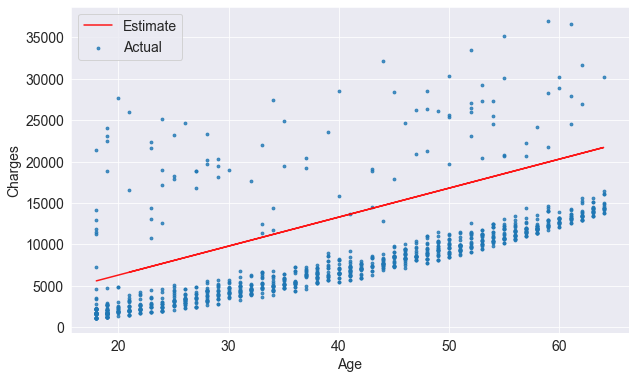

In [52]:
try_parameters(350,-700)

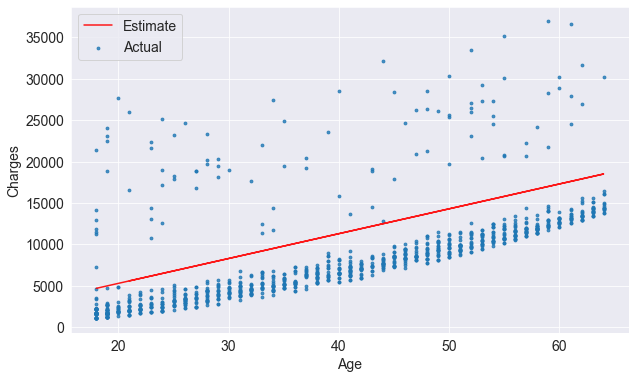

In [53]:
try_parameters(300,-700)

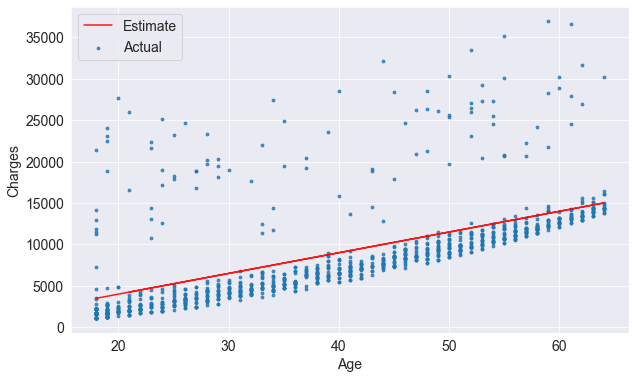

In [54]:
try_parameters(250,-1000)

So,as we decreased the value of b line started coming down and value of w needed to be calibrated as slope was demonstrating wrongful predictions, if we increase the value of w slope of the line increases and vice versa.

As we change the values, of  w  and  b  manually, trying to move the line visually closer to the points, we are learning the approximate relationship between "age" and "charges".

Now we need to make our computer do the above task by itself and To do this, we need to solve a couple of problems:

1. We need a way to measure numerically how well the line fits the points.

2. Once the "measure of fit" has been computed, we need a way to modify w and b to improve the the fit.

Loss/Cost Function
We can compare our model's predictions with the actual targets using the following method:

For a Loss function we can use root-mean-squared-method which first calculate the difference between tagets and predictions made by model after that,square of the obtained value is carried out to eliminate the possibility of negative numbers.next comes the mean of the elements and finally to balance out the squaring we square root the results obtained in previous step and thus by this we get our Loss function eligent and very useful.

Let's define a function to compute the RMSE

In [58]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

Let's compute the RMSE for our model with a sample set of weights

In [59]:
w = 50
b = 100

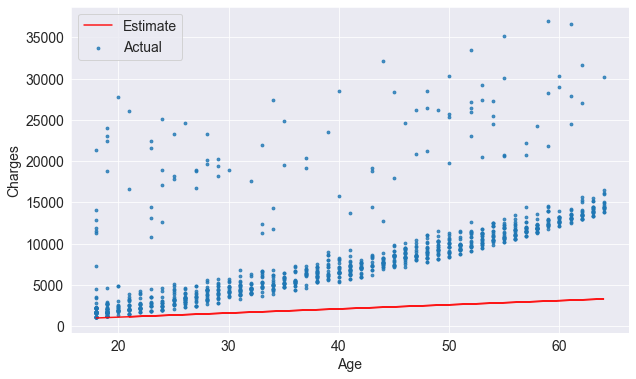

In [60]:
try_parameters(w, b)

In [61]:
targets = non_smoker_df['charges']
predicted = estimate_charges(non_smoker_df.age, w, b)

In [62]:
rmse(targets, predicted)

8461.949562575488

The result is called the loss because it indicates how bad the model is at predicting the target variables. It represents information loss in the model: the lower the loss, the better the model.

Let's modify the try_parameters functions to also display the loss.

In [63]:
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    predictions = estimate_charges(ages, w, b)
    
    plt.plot(ages, predictions, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Prediction', 'Actual']);
    
    loss = rmse(target, predictions)
    print("RMSE Loss: ", loss)

RMSE Loss:  8461.949562575488


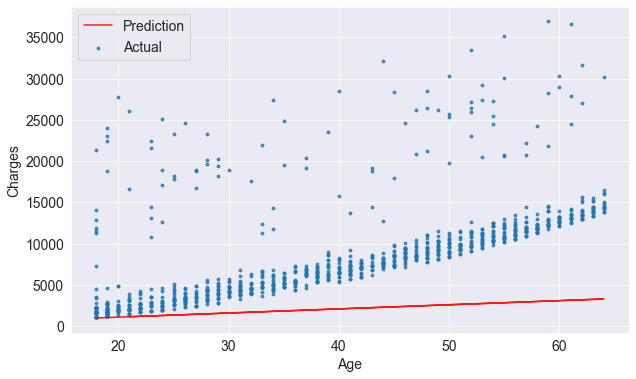

In [64]:
try_parameters(50, 100)

RMSE Loss:  4686.972905878285


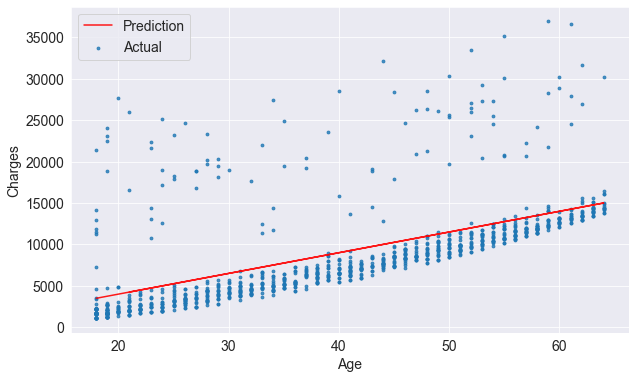

In [65]:
try_parameters(250,-1000)

RMSE Loss:  4673.637609506454


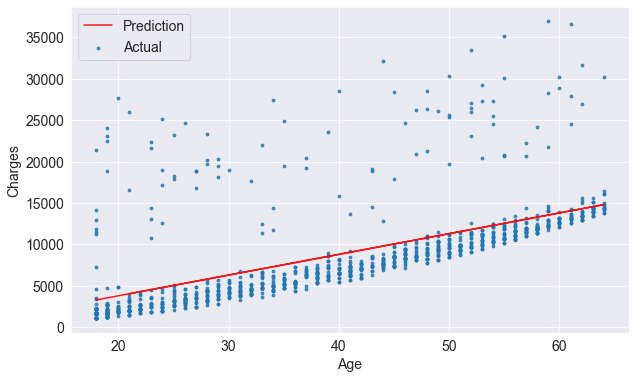

In [66]:
try_parameters(250,-1200)

RMSE Loss:  4664.426039892947


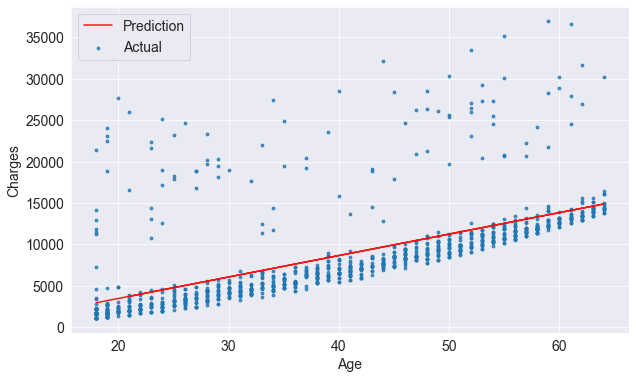

In [67]:
try_parameters(259,-1700)

for the value w = 259 and b = -1700 i got the RMSE value of 4664$ which was the lowest i could get after trying many values.for trial and error you should try by increasing values of parameter by high differences and if try some smaller difference values and incline to choose value of both upper and lower limit which present lower rmse.it's like binary sort algorithm and if you combine this strategy with gradient decent strategy you get a accurate parameters with faster execution

### Optimizer
Next, we need a strategy to modify weights w and b to reduce the loss and improve the "fit" of the line to the data.

Linear Regression using Scikit-learn
above methods are created by us manually but in practice we are periodically be using Scikit-learn as it contains all the necessary ML functions and libraries



In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor

In [69]:
model = LinearRegression()

Note:- that the input X must be a 2-d array, so we'll need to pass a dataframe, instead of a single column.

In [70]:
inputs = non_smoker_df[['age']]
targets = non_smoker_df.charges
print('inputs.shape :', inputs.shape)
print('targes.shape :', targets.shape)

inputs.shape : (1064, 1)
targes.shape : (1064,)


Let's fit the model to the data.

In [71]:
model.fit(inputs, targets)

LinearRegression()

In [72]:
predictions = model.predict(inputs)

In [73]:
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

Let's compute the RMSE loss to evaluate the model.

In [74]:
rmse(targets, predictions)

4662.505766636391

Seems like our prediction is off by $4000 on average, which is not too bad.

The parameters of the model are stored in the coef and intercept properties.

In [75]:
# w
model.coef_

array([267.24891283])

In [76]:
# b
model.intercept_

-2091.4205565650827

Optionally: Use the SGDRegressor class from scikit-learn to train a model using the stochastic gradient descent technique.

In [77]:
model1 = SGDRegressor()

In [78]:
model1.fit(inputs,targets)

SGDRegressor()

In [79]:
predictions = model1.predict(inputs)
rmse(targets, predictions)

12604.6989931007

### Model creation for Smokers in the dataset

In [81]:
smoker_df = df[df.smoker == 'yes']
smoker_df

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
11     62  female  26.290         0    yes  southeast  27808.72510
14     27    male  42.130         0    yes  southeast  39611.75770
19     30    male  35.300         0    yes  southwest  36837.46700
23     34  female  31.920         1    yes  northeast  37701.87680
...   ...     ...     ...       ...    ...        ...          ...
1313   19  female  34.700         2    yes  southwest  36397.57600
1314   30  female  23.655         3    yes  northwest  18765.87545
1321   62    male  26.695         0    yes  northeast  28101.33305
1323   42  female  40.370         2    yes  southeast  43896.37630
1337   61  female  29.070         0    yes  northwest  29141.36030

[274 rows x 7 columns]

In [82]:
inputs = smoker_df[['age']]
targets = smoker_df.charges
print('',inputs.shape)
print('',targets.shape)

 (274, 1)
 (274,)


In [83]:
model.fit(inputs,targets)

LinearRegression()

In [84]:
predicted = model.predict(inputs)
print('RMSE:',)
rmse(targets,predicted)

RMSE:


10711.00334810241

### Machine Learning
Every machine learning problem has three components:

1. Model

2. Cost Function

3. Optimizer

In [87]:
# Create inputs and targets
inputs, targets = non_smoker_df[['age']], non_smoker_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4662.505766636391


### Linear Regression using Multiple Features
So far, we've used on the "age" feature to estimate "charges". Adding another feature like "bmi" is fairly straightforward. We simply assume the following relationship:

charges=w1×age+w2×bmi+b 
We need to change just one line of code to include the BMI.

In [88]:
# Create inputs and targets
inputs, targets = non_smoker_df[['age', 'bmi']], non_smoker_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4662.312835461298


As you can see, adding the BMI doesn't seem to reduce the loss by much, as the BMI has a very weak correlation with charges, especially for non smokers.

In [89]:
non_smoker_df.charges.corr(non_smoker_df.bmi)

0.08403654312833272

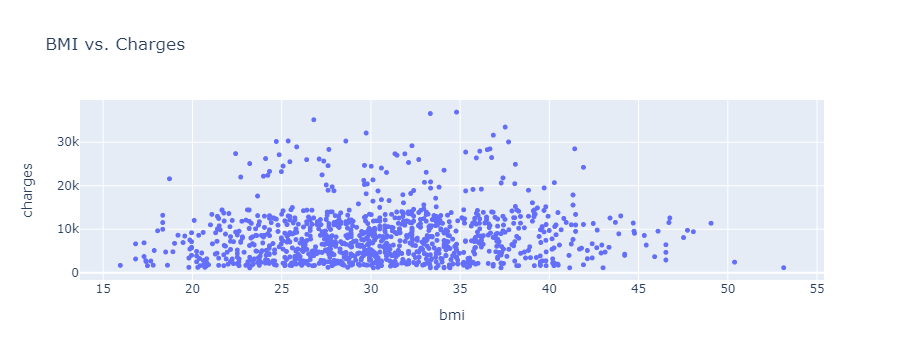

In [90]:
fig = px.scatter(non_smoker_df, x='bmi', y='charges', title='BMI vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

We can also visualize the relationship between all 3 variables "age", "bmi" and "charges" using a 3D scatter plot.

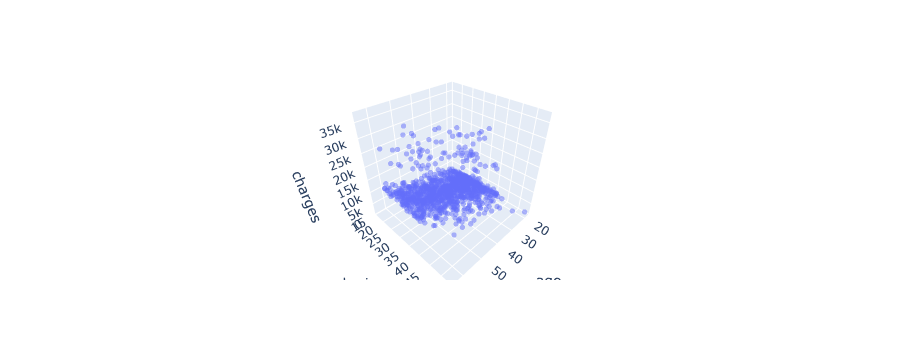

In [91]:
fig = px.scatter_3d(non_smoker_df, x='age', y='bmi', z='charges')
fig.update_traces(marker_size=3, marker_opacity=0.5)
fig.show()

You can see that it's harder to interpret a 3D scatter plot compared to a 2D scatter plot. As we add more features, it becomes impossible to visualize all feature at once, which is why we use measures like correlation and loss.

This is an important thing to keep in mind: you can't find a relationship that doesn't exist, no matter what machine learning technique or optimization algorithm you apply.


### Training a linear regression model to estimate charges using BMI alone

In [92]:
inputs,targets = non_smoker_df[['bmi']],non_smoker_df['charges']

In [93]:
model = LinearRegression().fit(inputs, targets)

In [94]:
predictions=model.predict(inputs)
loss = rmse(targets,predictions)
print('Loss:',loss)

Loss: 5969.772531913287


As BMI has very less correlation with charges we get a higher loss on a model which predicts charges on the basis of BMI as a independent variable as seen above loss value is increased which is a degradtion in our model

### Let's go one step further, and add the final numeric column: "children", which seems to have some correlation with "charges".

charges=w1×age+w2×bmi+w3×children+b

In [95]:
non_smoker_df.charges.corr(non_smoker_df.children)

0.138928704535422

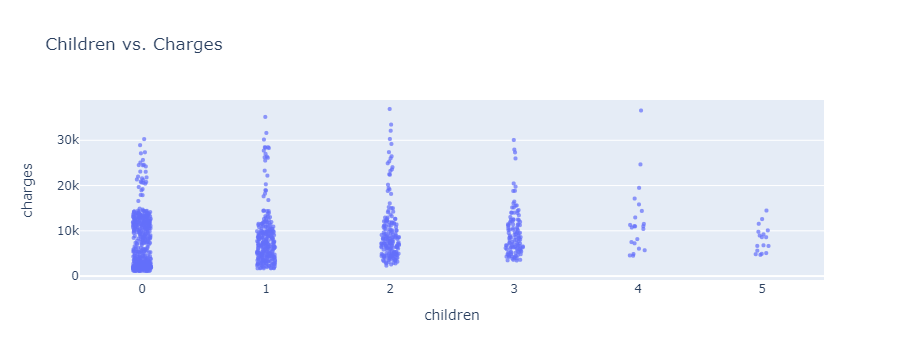

In [96]:
fig = px.strip(non_smoker_df, x='children', y='charges', title= "Children vs. Charges")
fig.update_traces(marker_size=4, marker_opacity=0.7)
fig.show()

In [97]:
# Create inputs and targets
inputs, targets = non_smoker_df[['age', 'bmi', 'children']], non_smoker_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4608.470405038245


Once again, we don't see a big reduction in the loss, even though it's greater than in the case of BMI.

Repeating the steps in this section to train a linear regression model to estimate medical charges for smokers.

In [99]:
inputs,targets = smoker_df[['age','children','bmi']],smoker_df['charges']

In [100]:
model = LinearRegression().fit(inputs, targets)
prediction = model.predict(inputs)

In [101]:
loss = rmse(targets,prediction)
print('Loss',loss)

Loss 5718.202480524153


Repeating the steps in this section to train a linear regression model to estimate medical charges for all customers.

In [102]:
# Create inputs and targets
inputs, targets = df[['age', 'bmi', 'children']], df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 11355.31790112597


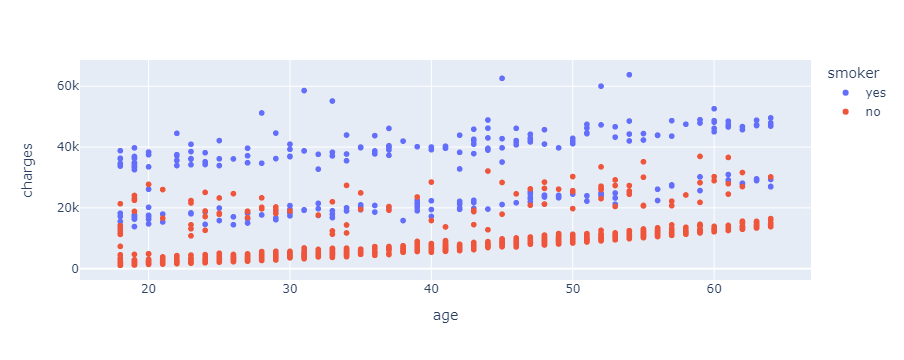

In [103]:
px.scatter(df,x="age",y="charges",color='smoker')

Loss is very high compared to earlier. This is because it is easier to fit a line for model when it is grouped for non-smokers and there would be some outliers as shown in above viz.

### Using Categorical Features for Machine Learning
So far we've been using only numeric columns, since we can only perform computations with numbers. If we could use categorical columns like "smoker", we can train a single model for the entire dataset.

To use the categorical columns, we simply need to convert them to numbers. There are three common techniques for doing this:

1. If a categorical column has just two categories (it's called a binary category), then we can replace their values with 0 and 1.
2. If a categorical column has more than 2 categories, we can perform one-hot encoding i.e. create a new column for each category with 1s and 0s.
3. If the categories have a natural order (e.g. cold, neutral, warm, hot), then they can be converted to numbers (e.g. 1, 2, 3, 4) preserving the order. These are called ordinals, we can perform using Label encoder

### Binary Categories
The "smoker" category has just two values "yes" and "no". Let's create a new column "smoker_code" containing 0 for "no" and 1 for "yes".

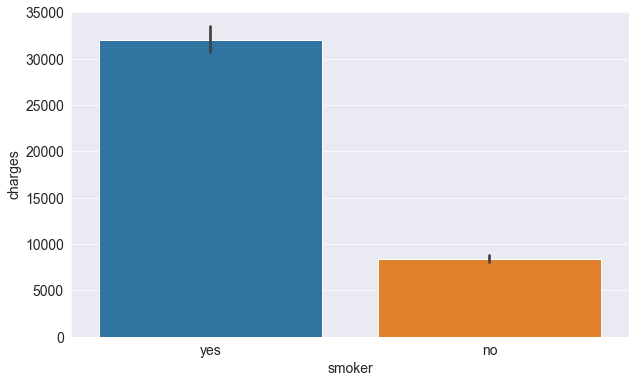

In [104]:
sns.barplot(data=df, x='smoker', y='charges');

In [107]:
smoker_codes = {'no': 0, 'yes': 1}
df['smoker_code'] = df.smoker.map(smoker_codes)

In [108]:
df.charges.corr(df.smoker_code)

0.7872514304984772

In [110]:
df

age     sex     bmi  children smoker     region      charges  \
0      19  female  27.900         0    yes  southwest  16884.92400   
1      18    male  33.770         1     no  southeast   1725.55230   
2      28    male  33.000         3     no  southeast   4449.46200   
3      33    male  22.705         0     no  northwest  21984.47061   
4      32    male  28.880         0     no  northwest   3866.85520   
...   ...     ...     ...       ...    ...        ...          ...   
1333   50    male  30.970         3     no  northwest  10600.54830   
1334   18  female  31.920         0     no  northeast   2205.98080   
1335   18  female  36.850         0     no  southeast   1629.83350   
1336   21  female  25.800         0     no  southwest   2007.94500   
1337   61  female  29.070         0    yes  northwest  29141.36030   

      smoker_code  
0               1  
1               0  
2               0  
3               0  
4               0  
...           ...  
1333            0  
1334            0  
1335            0  
1336            0  
1337            1  

[1338 rows x 8 columns]

We can now use the smoker_df column for linear regression.

charges=w1×age+w2×bmi+w3×children+w4×smoker+b

In [112]:
# Create inputs and targets
inputs, targets = df[['age', 'bmi', 'children', 'smoker_code']], df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6056.439217188078


The loss reduces from 11355 to 6056, almost by 50%! This is an important lesson: never ignore categorical data.

adding the "sex" column to the mix.

charges=w1×age+w2×bmi+w3×children+w4×smoker+w5×sex+b

<AxesSubplot:xlabel='sex', ylabel='charges'>

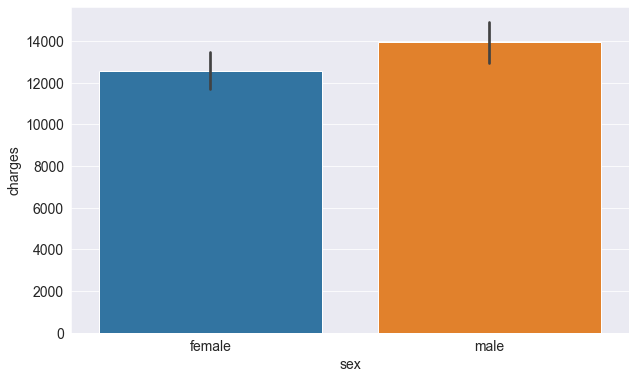

In [113]:
sns.barplot(data=df, x='sex', y='charges')

In [114]:
sex_codes = {'female': 0, 'male': 1}

In [115]:
df['sex_code'] = df.sex.map(sex_codes)

In [116]:
df

age     sex     bmi  children smoker     region      charges  \
0      19  female  27.900         0    yes  southwest  16884.92400   
1      18    male  33.770         1     no  southeast   1725.55230   
2      28    male  33.000         3     no  southeast   4449.46200   
3      33    male  22.705         0     no  northwest  21984.47061   
4      32    male  28.880         0     no  northwest   3866.85520   
...   ...     ...     ...       ...    ...        ...          ...   
1333   50    male  30.970         3     no  northwest  10600.54830   
1334   18  female  31.920         0     no  northeast   2205.98080   
1335   18  female  36.850         0     no  southeast   1629.83350   
1336   21  female  25.800         0     no  southwest   2007.94500   
1337   61  female  29.070         0    yes  northwest  29141.36030   

      smoker_code  sex_code  
0               1         0  
1               0         1  
2               0         1  
3               0         1  
4               0         1  
...           ...       ...  
1333            0         1  
1334            0         0  
1335            0         0  
1336            0         0  
1337            1         0  

[1338 rows x 9 columns]

In [117]:
df.charges.corr(df.sex_code)

0.057292062202025415

In [120]:
# Create inputs and targets
inputs, targets = df[['age', 'bmi', 'children', 'smoker_code', 'sex_code']], df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6056.1007087545395


#### One-hot Encoding
The "region" column contains 4 values, so we'll need to use hot encoding and create a new column for each region.

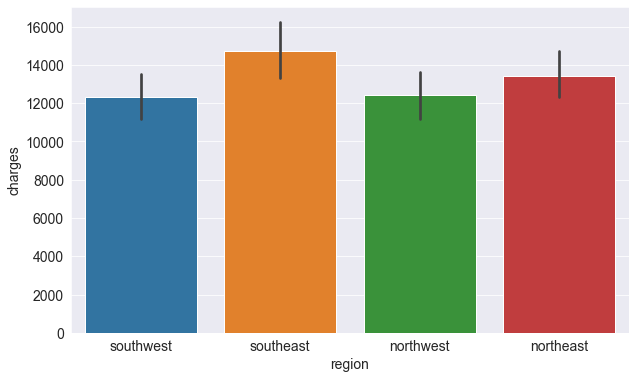

In [122]:
sns.barplot(data=df, x='region', y='charges');

In [123]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(df[['region']])
enc.categories

'auto'

In [124]:
enc.transform([['northeast']]).toarray()

C:\Users\OLUBAYODE\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but OneHotEncoder was fitted with feature names



array([[1., 0., 0., 0.]])

In [125]:
one_hot = enc.transform(df[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [126]:
df[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot

In [128]:
df

age     sex     bmi  children smoker     region      charges  \
0      19  female  27.900         0    yes  southwest  16884.92400   
1      18    male  33.770         1     no  southeast   1725.55230   
2      28    male  33.000         3     no  southeast   4449.46200   
3      33    male  22.705         0     no  northwest  21984.47061   
4      32    male  28.880         0     no  northwest   3866.85520   
...   ...     ...     ...       ...    ...        ...          ...   
1333   50    male  30.970         3     no  northwest  10600.54830   
1334   18  female  31.920         0     no  northeast   2205.98080   
1335   18  female  36.850         0     no  southeast   1629.83350   
1336   21  female  25.800         0     no  southwest   2007.94500   
1337   61  female  29.070         0    yes  northwest  29141.36030   

      smoker_code  sex_code  northeast  northwest  southeast  southwest  
0               1         0        0.0        0.0        0.0        1.0  
1               0         1        0.0        0.0        1.0        0.0  
2               0         1        0.0        0.0        1.0        0.0  
3               0         1        0.0        1.0        0.0        0.0  
4               0         1        0.0        1.0        0.0        0.0  
...           ...       ...        ...        ...        ...        ...  
1333            0         1        0.0        1.0        0.0        0.0  
1334            0         0        1.0        0.0        0.0        0.0  
1335            0         0        0.0        0.0        1.0        0.0  
1336            0         0        0.0        0.0        0.0        1.0  
1337            1         0        0.0        1.0        0.0        0.0  

[1338 rows x 13 columns]

Let's include the region columns into our linear regression model.

$charges = w_1 \times age + w_2 \times bmi + w_3 \times children + w_4 \times smoker + w_5 \times sex + w_6 \times northeast + w_7 \times northwest + w_8 \times southeast

w_9 \times southwest + b$

In [129]:
# Create inputs and targets
input_cols = ['age', 'bmi', 'children', 'smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
inputs, targets = df[input_cols], df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6041.679651174455


Once again, this leads to a fairly small reduction in the loss.

Insightful question: Are two separate linear regression models, one for smokers and one of non-smokers, better than a single linear regression model?

In [130]:
#encoding for sex column in smoker_df
sex_codes = {'female': 0, 'male': 1}
smoker_df['sex_code'] = smoker_df.sex.map(sex_codes) 

#one-hot coding for smoker_df
enc.fit(smoker_df[['region']])
one_hot = enc.transform(smoker_df[['region']]).toarray()
one_hot
smoker_df[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot

# Create inputs and targets
input_cols = ['age', 'bmi', 'children', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
inputs, targets = smoker_df[input_cols], smoker_df['charges']

# Create and train the model
model_smoker = LinearRegression().fit(inputs, targets)

# Generate predictions
prediction = model_smoker.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, prediction)
print('Loss:', loss)

Loss: 5668.467882112154


C:\Users\OLUBAYODE\AppData\Local\Temp\ipykernel_14532\1493334516.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\OLUBAYODE\AppData\Local\Temp\ipykernel_14532\1493334516.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\OLUBAYODE\AppData\Local\Temp\ipykernel_14532\1493334516.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

In [131]:
#encoding for sex column in smoker_df
sex_codes = {'female': 0, 'male': 1}
non_smoker_df['sex_code'] = non_smoker_df.sex.map(sex_codes) 

#one-hot coding for smoker_df
enc.fit(non_smoker_df[['region']])
one_hot = enc.transform(non_smoker_df[['region']]).toarray()
one_hot
non_smoker_df[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot

# Create inputs and targets
input_cols = ['age', 'bmi', 'children', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
inputs, targets = non_smoker_df[input_cols], non_smoker_df['charges']

# Create and train the model
model_non_smoker= LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model_non_smoker.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4573.074988795491


C:\Users\OLUBAYODE\AppData\Local\Temp\ipykernel_14532\1507918284.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\OLUBAYODE\AppData\Local\Temp\ipykernel_14532\1507918284.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\OLUBAYODE\AppData\Local\Temp\ipykernel_14532\1507918284.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

From above results it is evident that we should be using different model for smoker and non-smoker customers as loss from combined dataframe was around 6000 but,on the other hand we got loss of around 5000 for smokers and 4500 for non-smokers which is better than using only one model for whole customer base

### Model Improvements
Feature Scaling
Recall that due to regulatory requirements, we also need to explain the rationale behind the predictions our model.

charges=w1×age+w2×bmi+w3×children+w4×smoker+w5×sex+w6×region+b 
To compare the importance of each feature in the model, our first instinct might be to compare their weights.

In [132]:
model.coef_

array([  256.85635254,   339.19345361,   475.50054515, 23848.53454191,
        -131.3143594 ,   587.00923503,   234.0453356 ,  -448.01281436,
        -373.04175627])

In [133]:
model.intercept_

-12525.547811195454

In [134]:
input_cols = ['age', 'bmi', 'children', 'smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']

weights_df = pd.DataFrame({
    'feature': np.append(input_cols, 1),
    'weight': np.append(model.coef_ , model.intercept_)
})
weights_df

feature        weight
0          age    256.856353
1          bmi    339.193454
2     children    475.500545
3  smoker_code  23848.534542
4     sex_code   -131.314359
5    northeast    587.009235
6    northwest    234.045336
7    southeast   -448.012814
8    southwest   -373.041756
9            1 -12525.547811

While it seems like BMI and the "northeast" have a higher weight than age, keep in mind that the range of values for BMI is limited (15 to 40) and the "northeast" column only takes the values 0 and 1.

Because different columns have different ranges, we run into two issues:

1. We can't compare the weights of different column to identify which features are important
2. A column with a larger range of inputs may disproportionately affect the loss and dominate the optimization process.
For this reason, it's common practice to scale (or standardize) the values in numeric column by subtracting the mean and dividing by the standard deviation.

We can apply scaling using the StandardScaler class from scikit-learn.

In [135]:
df

age     sex     bmi  children smoker     region      charges  \
0      19  female  27.900         0    yes  southwest  16884.92400   
1      18    male  33.770         1     no  southeast   1725.55230   
2      28    male  33.000         3     no  southeast   4449.46200   
3      33    male  22.705         0     no  northwest  21984.47061   
4      32    male  28.880         0     no  northwest   3866.85520   
...   ...     ...     ...       ...    ...        ...          ...   
1333   50    male  30.970         3     no  northwest  10600.54830   
1334   18  female  31.920         0     no  northeast   2205.98080   
1335   18  female  36.850         0     no  southeast   1629.83350   
1336   21  female  25.800         0     no  southwest   2007.94500   
1337   61  female  29.070         0    yes  northwest  29141.36030   

      smoker_code  sex_code  northeast  northwest  southeast  southwest  
0               1         0        0.0        0.0        0.0        1.0  
1               0         1        0.0        0.0        1.0        0.0  
2               0         1        0.0        0.0        1.0        0.0  
3               0         1        0.0        1.0        0.0        0.0  
4               0         1        0.0        1.0        0.0        0.0  
...           ...       ...        ...        ...        ...        ...  
1333            0         1        0.0        1.0        0.0        0.0  
1334            0         0        1.0        0.0        0.0        0.0  
1335            0         0        0.0        0.0        1.0        0.0  
1336            0         0        0.0        0.0        0.0        1.0  
1337            1         0        0.0        1.0        0.0        0.0  

[1338 rows x 13 columns]

In [136]:
from sklearn.preprocessing import StandardScaler

In [137]:
numeric_cols = ['age', 'bmi', 'children'] 
scaler = StandardScaler()
scaler.fit(df[numeric_cols])

StandardScaler()

In [138]:
scaler.mean_

array([39.20702541, 30.66339686,  1.09491779])

In [139]:
scaler.var_

array([197.25385199,  37.16008997,   1.45212664])

We can now scale data as follows:

In [140]:
df[numeric_cols]

age     bmi  children
0      19  27.900         0
1      18  33.770         1
2      28  33.000         3
3      33  22.705         0
4      32  28.880         0
...   ...     ...       ...
1333   50  30.970         3
1334   18  31.920         0
1335   18  36.850         0
1336   21  25.800         0
1337   61  29.070         0

[1338 rows x 3 columns]

In [141]:
scaled_inputs = scaler.transform(df[numeric_cols])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

These can now we combined with the categorical data

In [143]:
cat_cols = ['smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
categorical_data = df[cat_cols].values

In [145]:
categorical_data

array([[1., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0., 0.]])

In [147]:
inputs = np.concatenate((scaled_inputs, categorical_data), axis=1)
targets = df.charges

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6041.679651174455


We can now compare the weights in the formula:

charges=w1×age+w2×bmi+w3×children+w4×smoker+w5×sex+w6×region+b

In [148]:
weights_df = pd.DataFrame({
    'feature': np.append(numeric_cols + cat_cols, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df.sort_values('weight', ascending=False)

feature        weight
3  smoker_code  23848.534542
9            1   8466.483215
0          age   3607.472736
1          bmi   2067.691966
5    northeast    587.009235
2     children    572.998210
6    northwest    234.045336
4     sex_code   -131.314359
8    southwest   -373.041756
7    southeast   -448.012814

As you can see now, the most important feature are:

1. Smoker

2. Age

3. BMI

In [149]:
new_customers = [[28,30,2,1,0,0,1,0,0.]]
scaler.transform([[28,30,2]])

C:\Users\OLUBAYODE\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



array([[-0.79795355, -0.10882659,  0.75107928]])

In [150]:
model.predict([[-0.79795355, -0.10882659,  0.75107928,1,0,0,1,0,0.]])

array([29875.81463371])

### Creating a Test Set

In [152]:
from sklearn.model_selection import train_test_split

In [153]:
inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, targets, test_size=0.2,random_state=0)

In [154]:
# Create and train the model
model = LinearRegression().fit(inputs_train, targets_train)

# Generate predictions
predictions_test = model.predict(inputs_test)

# Compute loss to evalute the model
loss = rmse(targets_test, predictions_test)
print('Test Loss:', loss)

Test Loss: 5641.626558850192


Let's compare this with the training loss

In [155]:
# Generate predictions
predictions_train = model.predict(inputs_train)

# Compute loss to evalute the model
loss = rmse(targets_train, predictions_train)
print('Training Loss:', loss)

Training Loss: 6140.157418880167


### Workflow of Machine Learning Problem
1. Explore the data and find correlations between inputs and targets
2. Pick the right model, loss functions and optimizer for the problem at hand
3. Scale numeric variables and one-hot encode categorical data
4. Set aside a test set (using a fraction of the training set)
5. Train the model
6. Make predictions on the test set and compute the loss